<a href="https://colab.research.google.com/github/virenemmanuel/BizCardX-Extracting-Business-Card-Data-with-OCR/blob/main/BizCardX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [2]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [3]:
! pip install streamlit_option_menu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 11.1 MB/s eta 0:00:00


In [22]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3


In [23]:
def image_to_text(path):

    input_image = Image.open(path)

    # Converting Image to array:
    image_array = np.array(input_image)

    reader = easyocr.Reader(['en'])
    text = reader.readtext(image_array, detail = 0)

    return text, input_image


In [24]:
image_to_text("/content/1.png")

(['Selva',
  'DATA MANAGER',
  '+123-456-7890',
  '+123-456-7891',
  'WWW XYZI.com',
  'hello@XYZ1.com',
  '123 ABC St , Chennai;',
  'selva',
  'TamilNadu 600113',
  'digitals'],
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1004x590>)

In [25]:
text_image, input_image = image_to_text("/content/2.png")

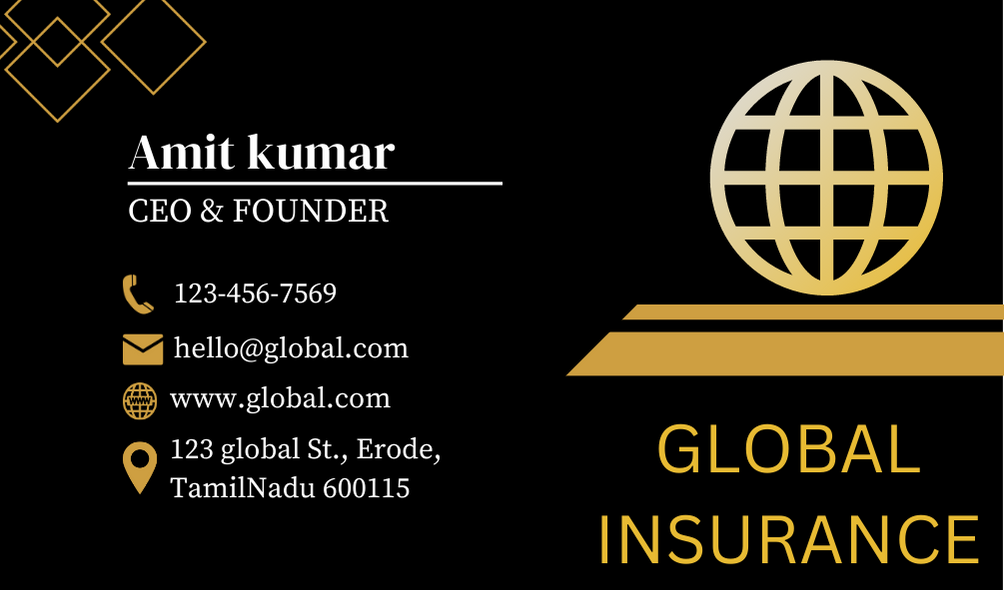

In [8]:
input_image

In [9]:
df = pd.DataFrame(text_image, columns=["Text"])
df

,Text
0,Amit kumar
1,CEO & FOUNDER
2,123-456-7569
3,hello@global.com
4,WWW
5,global.com
6,123 global
7,"Erode,"
8,GLOBAL
9,TamilNadu 600115


In [10]:
text_image

['Amit kumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'WWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'TamilNadu 600115',
 'INSURANCE',
 'St ,']

In [11]:
from typing import Concatenate
def extracted_text(texts):

  extracted_dict = {"NAME":[],"DESIGNATION":[],
                    "COMPANY_NAME":[],"CONTACT_NO":[],
                    "EMAIL_ADD":[],"WEBSITE":[],
                    "ADDRESS":[],"PIN_CODE":[]}

  extracted_dict["NAME"].append(texts[0])
  extracted_dict["DESIGNATION"].append(texts[1])

  for i in range(2,len(texts)):

    if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and '-' in texts[i]):

       extracted_dict["CONTACT_NO"].append(texts[i])

    elif "@" in texts[i] and ".com" in texts[i]:
      extracted_dict["EMAIL_ADD"].append(texts[i])

    elif "WWW" in texts[i] or "www" in texts[i] or "Www" in texts[i] or "wWw" in texts[i] or "wwW" in texts[i]:
      small = texts[i].lower()
      extracted_dict["WEBSITE"].append(small)

    elif "Tamil Nadu" in texts[i] or "TamilNadu" in texts[i] or texts[i].isdigit():
      extracted_dict["PIN_CODE"].append(texts[i])

    elif re.match(r'^[A-Za-z]',texts[i]):
      extracted_dict["COMPANY_NAME"].append(texts[i])

    else:
      remove_colone = re.sub('r[,;]','',texts[i])
      extracted_dict["ADDRESS"].append(remove_colone)

  for key,value in extracted_dict.items():
    if len(value) > 0:
      Concatenate = " ".join(value)
      extracted_dict[key] = Concatenate

    else:
      value = "NA"
      extracted_dict[key] = value

  return extracted_dict



In [12]:
text_data = extracted_text(text_image)

In [13]:
df = pd.DataFrame(text_data,  index=[0])
df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT_NO,EMAIL_ADD,WEBSITE,ADDRESS,PIN_CODE
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115


In [14]:
text_image

['Amit kumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'WWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'TamilNadu 600115',
 'INSURANCE',
 'St ,']

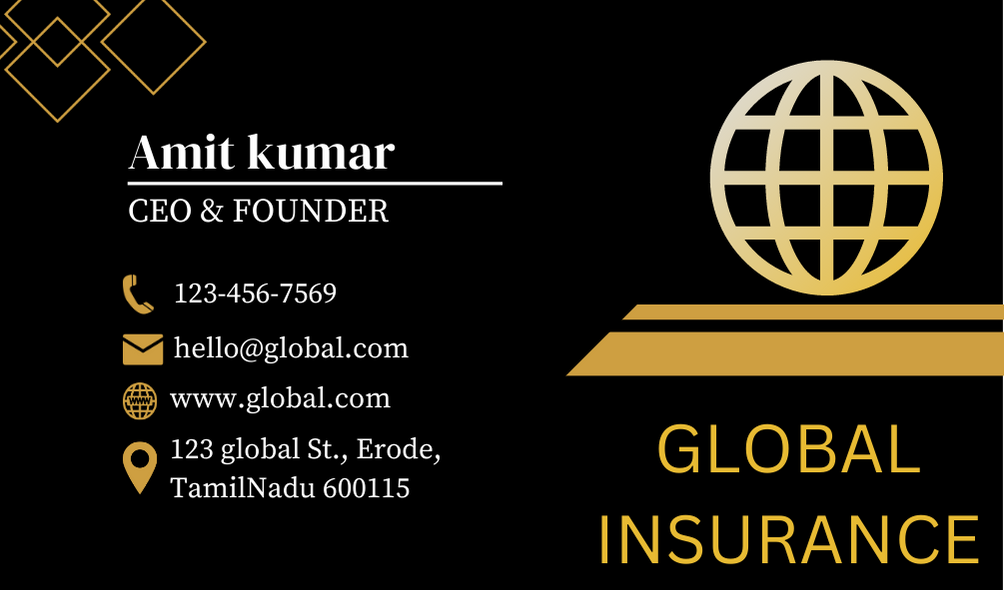

In [15]:
input_image

In [16]:
# Converting Image to Bytes

Image_bytes = io.BytesIO()
input_image.save(Image_bytes, format='PNG')
Image_Data = Image_bytes.getvalue()

# creating Dictionary
data = {"Image":[Image_Data]}

df_1 = pd.DataFrame(data)

concat_df = pd.concat([df,df_1], axis=1)
concat_df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT_NO,EMAIL_ADD,WEBSITE,ADDRESS,PIN_CODE,Image
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [27]:
# Sql connection

mydb = sqlite3.connect("Bizcard.db")
cursor = mydb.cursor()

# creating sql Table

create_table_query = '''CREATE TABLE IF NOT EXISTS bizcard_table(name varchar(225),
                                                                 designation varchar(225),
                                                                 company_name varchar(225),
                                                                 contact_no varchar(225),
                                                                 email_id varchar(225),
                                                                 website text,
                                                                 address text,
                                                                 pin_code varchar(225),
                                                                 image text)'''

cursor.execute(create_table_query)
mydb.commit()

In [34]:
# insert query

insert_query = ''' INSERT INTO bizcard_table(name,
                                             designation,
                                             company_name,
                                             contact_no,
                                             email_id,
                                             website,
                                             address,
                                             pin_code,
                                             image)

                                             values(?,?,?,?,?,?,?,?,?)'''

datas = concat_df.values.tolist()
cursor.execute(insert_query, datas[0])
mydb.commit()

In [50]:
# select query

select_query = '''SELECT * FROM bizcard_table'''
cursor.execute(select_query)
result = cursor.fetchall()
mydb.commit()

table_df = pd.DataFrame(result, columns=("NAME","DESIGNATION","COMPANY_NAME","CONTACT_NO","EMAIL_ADD","WEBSITE","ADDRESS","PIN_CODE","Image"))
table_df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT_NO,EMAIL_ADD,WEBSITE,ADDRESS,PIN_CODE,Image
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,Selva,DATA MANAGER,selva digitals,+123-456-7890 +123-456-7891,hello@XYZ1.com,www xyzi.com,"123 ABC St , Chennai;",TamilNadu 600113,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [39]:
datas = concat_df.values.tolist()
datas

[['Amit kumar',
  'CEO & FOUNDER',
  'global.com Erode, GLOBAL INSURANCE St ,',
  '123-456-7569',
  'hello@global.com',
  'www',
  '123 global',
  'TamilNadu 600115',
  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xec\x00\x00\x02N\x08\x06\x00\x00\x00-z\x8d\xd9\x00\x01\x00\x00IDATx\x9c\xec\x9du`\x14\xd7\xda\xc6\x7f3\xb3\xbbqW H\x0c)\x94\x1a\xd2\x16\xea\xd4K\rm\xa9\xcb\xedmo\xa9\xcbW\xef\xed\xad{{\xeb\xbd5\xea\xee\xeeT(\xa5\x06-\x96\x04\xd7\x18I\x88\xac\xce\xcc\xf7\xc7\xec\xacD \t\x81\x04\xfa\xfe\xeeM\x97\xdd\x1dy\xcf\x99\t\xccs\x9e\xf7\xbcG\x01L\xb6\x90CGe\xf1\xaf\t\x85\xf4\xcf\x8d\xa7|\x83\x9b\x07^[\xcag?W\xe0\xd7\xb7\xf8\xd0;\x1c.\xa7\xca\x81\xbbgr\xe5I\xc5\xa4\'\xc7\xb0\xb6\xca\xcd\x13\xef-\xe7\xedo\xd7uwh\xed"1N\xe3\xec\xf1\xfd\x99zp_\\N\x95\xd9\x0b6p\xef\xcbe\x94\xacjD\xa1s7\xd3\xc8\xc1\xa9\\4\xa5\x90\xdd\x06\xa6R\xbe\xc1\xcb\xcb\x9f\xaf\xe2\x7f\xef\xaf\xc0\x90\xdbG\x10\x04A\x10\x04A\x10\x84\xbf!yyy\xac\\\xb9\x12uK\x0e\xa2(0bP\nW\x9e4\x90\xc2>\tT\xd4x\xb8\xef\xd5%|8\xab\\\xc4z

In [46]:
%%writefile Bizcard.py


import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3



def image_to_text(path):

    input_image = Image.open(path)

    # Converting Image to array:
    image_array = np.array(input_image)

    reader = easyocr.Reader(['en'])
    text = reader.readtext(image_array, detail = 0)

    return text, input_image


from typing import Concatenate
def extracted_text(texts):

  extracted_dict = {"NAME":[],"DESIGNATION":[],
                    "COMPANY_NAME":[],"CONTACT_NO":[],
                    "EMAIL_ADD":[],"WEBSITE":[],
                    "ADDRESS":[],"PIN_CODE":[]}

  extracted_dict["NAME"].append(texts[0])
  extracted_dict["DESIGNATION"].append(texts[1])

  for i in range(2,len(texts)):

    if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and '-' in texts[i]):

       extracted_dict["CONTACT_NO"].append(texts[i])

    elif "@" in texts[i] and ".com" in texts[i]:
      extracted_dict["EMAIL_ADD"].append(texts[i])

    elif "WWW" in texts[i] or "www" in texts[i] or "Www" in texts[i] or "wWw" in texts[i] or "wwW" in texts[i]:
      small = texts[i].lower()
      extracted_dict["WEBSITE"].append(small)

    elif "Tamil Nadu" in texts[i] or "TamilNadu" in texts[i] or texts[i].isdigit():
      extracted_dict["PIN_CODE"].append(texts[i])

    elif re.match(r'^[A-Za-z]',texts[i]):
      extracted_dict["COMPANY_NAME"].append(texts[i])

    else:
      remove_colone = re.sub('r[,;]','',texts[i])
      extracted_dict["ADDRESS"].append(remove_colone)

  for key,value in extracted_dict.items():
    if len(value) > 0:
      Concatenate = " ".join(value)
      extracted_dict[key] = Concatenate

    else:
      value = "NA"
      extracted_dict[key] = value

  return extracted_dict



# Streamlit section

st.set_page_config(layout="wide")
st.title("BIZCARDX: EXTRACTING BUSINESS CARD DATA WITH OCR")

with st.sidebar:

  select = option_menu("Main Menu",["Home","Upload & Modifying","Delete"])

if select == "Home":
  pass

elif select == "Upload & Modifying":
  img = st.file_uploader("Upload the Image", type= ["png","jpg","jpeg"])

  if img is not None:
    st.image(img,width= 300)

    text_image,input_img = image_to_text(img)

    text_dict = extracted_text(text_image)

    if text_dict:
      st.success("Text is Extracted Successfully")

    df = pd.DataFrame(text_dict, index=[0])

    # Converting Image to Bytes

    Image_bytes = io.BytesIO()
    input_img.save(Image_bytes, format='PNG')
    Image_Data = Image_bytes.getvalue()

    # creating Dictionary
    data = {"Image":[Image_Data]}

    df_1 = pd.DataFrame(data)

    concat_df = pd.concat([df,df_1], axis=1)
    st.dataframe(concat_df)

    button_1 = st.button("Save", use_container_width = True)

    if button_1:

      # Sql connection
      mydb = sqlite3.connect("Bizcard.db")
      cursor = mydb.cursor()

      # creating sql Table
      create_table_query = '''CREATE TABLE IF NOT EXISTS bizcard_table(name varchar(225),
                                                                      designation varchar(225),
                                                                      company_name varchar(225),
                                                                      contact_no varchar(225),
                                                                      email_id varchar(225),
                                                                      website text,
                                                                      address text,
                                                                      pin_code varchar(225),
                                                                      image text)'''

      cursor.execute(create_table_query)
      mydb.commit()

      # insert query

      insert_query = ''' INSERT INTO bizcard_table(name,
                                                   designation,
                                                   company_name,
                                                   contact_no,
                                                   email_id,
                                                   website,
                                                   address,
                                                   pin_code,
                                                   image)

                                                  values(?,?,?,?,?,?,?,?,?)'''

      datas = concat_df.values.tolist()
      cursor.execute(insert_query, datas[0])
      mydb.commit()

      st.success("SAVED SUCCESSFULLY")

  method = st.radio("Select the method",["None","Preview","Modify"])

  if method == "Preview":

    mydb = sqlite3.connect("Bizcard.db")
    cursor = mydb.cursor()

    # select query
    select_query = '''SELECT * FROM bizcard_table'''
    cursor.execute(select_query)
    result = cursor.fetchall()
    mydb.commit()

    table_df = pd.DataFrame(result, columns=("NAME","DESIGNATION","COMPANY_NAME","CONTACT_NO","EMAIL_ADD","WEBSITE","ADDRESS","PIN_CODE","Image"))
    st.dataframe(table_df)




elif select == "Delete":
  pass





Overwriting Bizcard.py


In [47]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
changed 22 packages in 2s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [48]:
!wget -q -O - http://ipv4.icanhazip.com

34.173.83.252


In [51]:
! streamlit run Bizcard.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.173.83.252:8501

⠼⠴⠦your url is: https://sixty-taxis-turn.loca.lt
2025-03-16 12:55:37.429 Examining the path of torch.classes raised:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 345, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", line 217, in get_module_paths
    potential_paths = extract_paths(module)
                      ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", line 210, in <lambda>
    lambda m: list(m.__pat